**Import Library**

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Download and prepare the CIFAR-10 dataset**

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

**Feature Extraction - Convolutional Base**

In [4]:
train_images[100].shape

(32, 32, 3)

In [110]:
model = models.Sequential()
model.add(layers.Conv2D( 64, (3,3), activation='relu', input_shape=(32,32,3) ) )
model.add(layers.MaxPooling2D( (2,2) ))
model.add(layers.Conv2D( 64, (3,3), activation='relu' ) )
model.add(layers.MaxPooling2D( (2,2) ))
model.add(layers.Conv2D( 64, (3,3), activation='relu' ) )
model.add(layers.Dropout(0.25))

In [111]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 dropout_11 (Dropout)        (None, 4, 4, 64)        

**Flatten & Fully Connected Layer**

In [112]:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation= 'relu'))
model.add(layers.Dense(100))

In [113]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 dropout_11 (Dropout)        (None, 4, 4, 64)        

**Compile and train the model**

In [114]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [115]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=200, validation_data=(test_images, test_labels))

Epoch 1/10
250/250 [==============================] - 34s 133ms/step - loss: 1.9389 - accuracy: 0.2983 - val_loss: 1.5953 - val_accuracy: 0.4084
Epoch 2/10
250/250 [==============================] - 34s 135ms/step - loss: 1.4578 - accuracy: 0.4703 - val_loss: 1.3103 - val_accuracy: 0.5270
Epoch 3/10
250/250 [==============================] - 34s 135ms/step - loss: 1.2953 - accuracy: 0.5384 - val_loss: 1.2417 - val_accuracy: 0.5612
Epoch 4/10
250/250 [==============================] - 35s 139ms/step - loss: 1.1858 - accuracy: 0.5781 - val_loss: 1.1045 - val_accuracy: 0.6092
Epoch 5/10
250/250 [==============================] - 34s 137ms/step - loss: 1.0894 - accuracy: 0.6148 - val_loss: 1.0869 - val_accuracy: 0.6216
Epoch 6/10
250/250 [==============================] - 34s 136ms/step - loss: 1.0270 - accuracy: 0.6388 - val_loss: 1.0338 - val_accuracy: 0.6409
Epoch 7/10
250/250 [==============================] - 34s 137ms/step - loss: 0.9640 - accuracy: 0.6631 - val_loss: 1.0219 - val_ac

**Evaluate the model**

In [116]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 8ms/step - loss: 0.8486 - accuracy: 0.7010


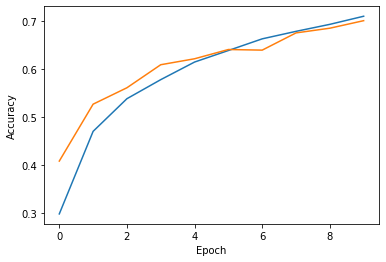

In [117]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()




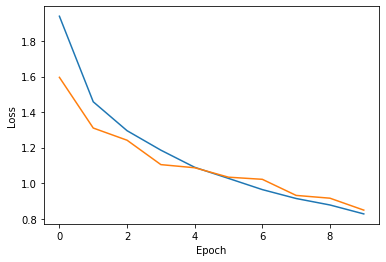

In [118]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


